In [1]:
import sys
import os
import pandas as pd
root_dir = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(root_dir)
from src.prediction.prediction import curtailment_power_prediction, naive_predict
from src.utils import prepare_data_for_anlagenschlüssel_df

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_ready = pd.read_csv("../data/df_ready.csv")
selected_Anlagenschlüssel = 'E2187801EA01000000ABENE0000100037'
df_timeline_day = prepare_data_for_anlagenschlüssel_df(df_ready, selected_Anlagenschlüssel,freq="D")
df_timeline_hour = prepare_data_for_anlagenschlüssel_df(df_ready, selected_Anlagenschlüssel,freq="H")

/workspaces/curtailment/src/utils.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start'] = pd.to_datetime(df['Start'])
/workspaces/curtailment/src/utils.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ende'] = pd.to_datetime(df['Ende'])
/workspaces/curtailment/src/utils.py:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[34857.26388889]' has dtype incompatible with int64, please explicitly cast to a compatible dtype

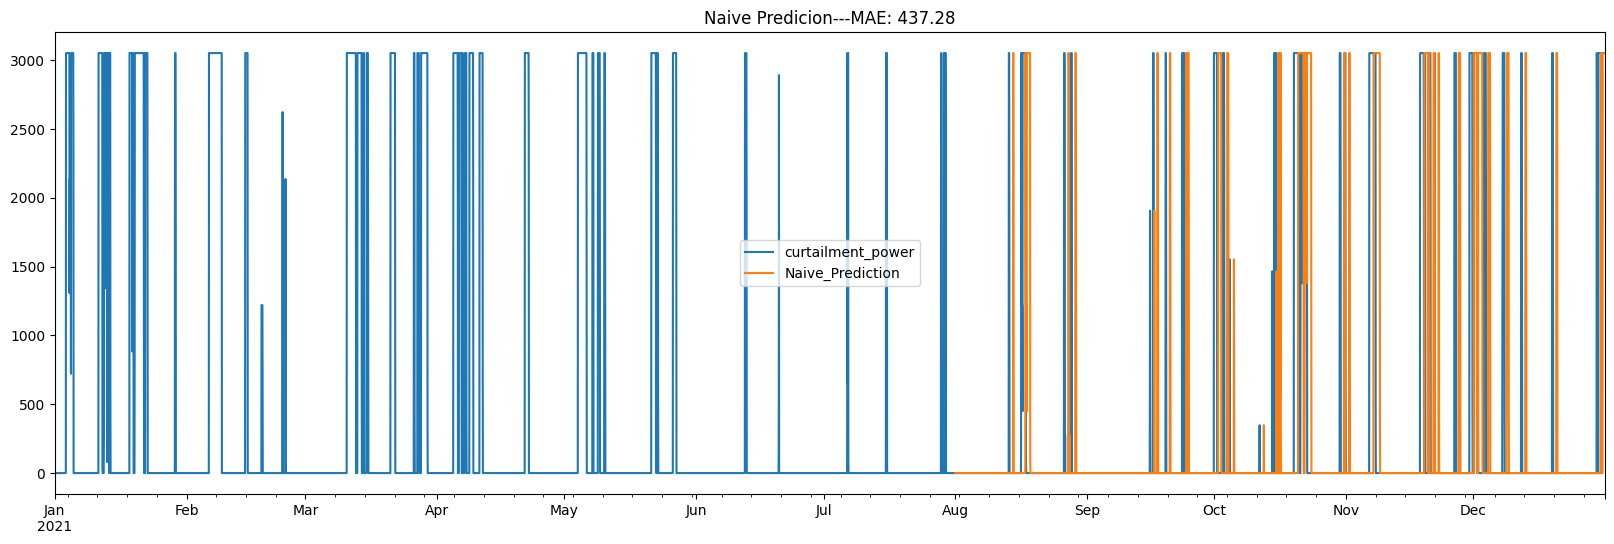

In [3]:
df_hour_naive = naive_predict(df_timeline_hour, pd.Timestamp('2021-08-01'), plot=True)

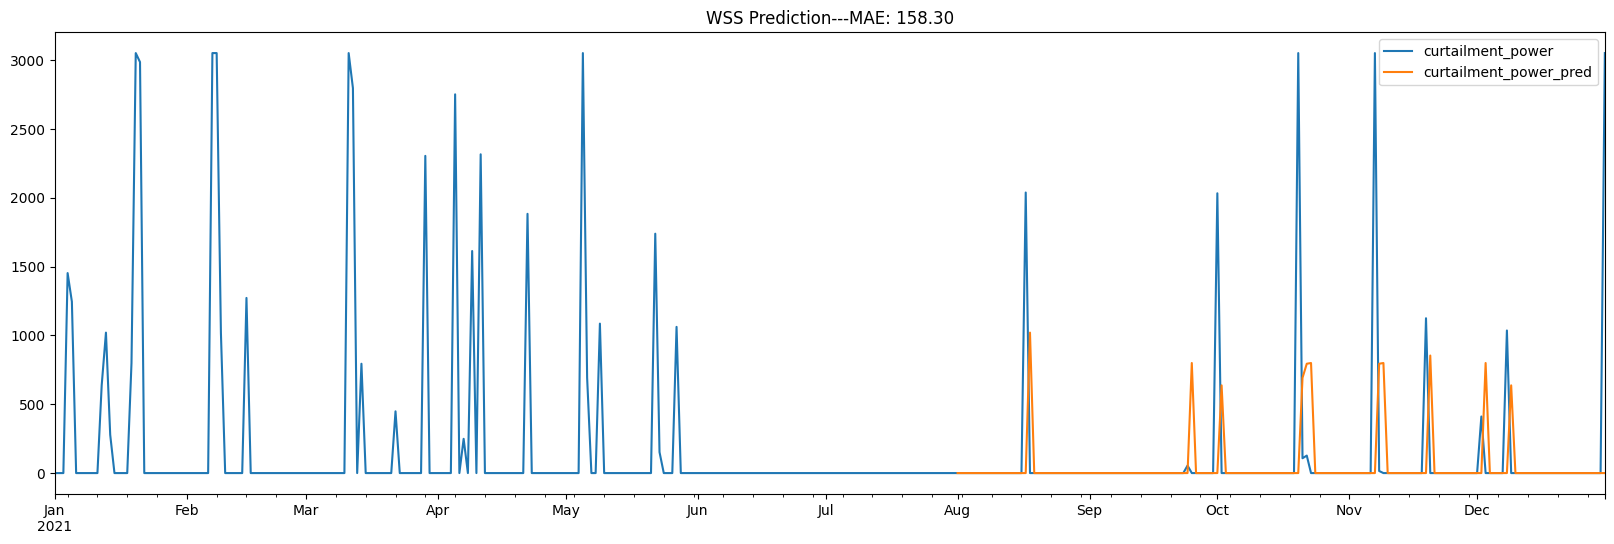

In [18]:
df_hour_wss = curtailment_power_prediction(df_timeline_day, pd.Timestamp('2021-08-01'), 'WSS', plot=True)